In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### analisis de los datos dentro del csv

In [3]:
# Leer el archivo CSV
df = pd.read_csv('NYC_air_quality.csv')

# Obtener la cantidad de elementos en el DataFrame
cantidad_elementos = df.size

# Obtener la cantidad de valores nulos por columna
cantidad_nulos_por_columna = df.isnull().sum()

# Obtener el tipo de dato en cada columna
tipos_de_dato_por_columna = df.dtypes

# Obtener una descripción estadística del DataFrame
descripcion_estadistica = df.describe()

# Imprimir los resultados
print("Cantidad de elementos en el DataFrame:", cantidad_elementos)
print("\nCantidad de valores nulos por columna:")
print(cantidad_nulos_por_columna)
print("\nTipo de dato en cada columna:")
print(tipos_de_dato_por_columna)
print("\nDescripción estadística del DataFrame:")
print(descripcion_estadistica)


Cantidad de elementos en el DataFrame: 71825

Cantidad de valores nulos por columna:
contaminante    0
data_value      0
measure_info    0
fecha           0
Barrio          0
dtype: int64

Tipo de dato en cada columna:
contaminante     object
data_value      float64
measure_info     object
fecha            object
Barrio           object
dtype: object

Descripción estadística del DataFrame:
         data_value
count  14365.000000
mean      16.804504
std        9.098905
min        0.600000
25%        9.000000
50%       14.300000
75%       24.500000
max       50.600000


### listamos el contenido dentro de la columna 'contaminante'

In [15]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('NYC_air_quality.csv')

# Obtener los elementos únicos de la columna 'contaminante'
contaminantes_unicos = df['contaminante'].unique()

# Imprimir los elementos únicos
print(contaminantes_unicos)


['Outdoor Air Toxics - Benzene' 'Outdoor Air Toxics - Formaldehyde'
 'Fine particles (PM 2.5)' 'Nitrogen dioxide (NO2)' 'Ozone (O3)']


 ### Concentración promedio anual por indicador, Calcula la concentración promedio anual por[mcg/m3] para cada indicador de contaminante.


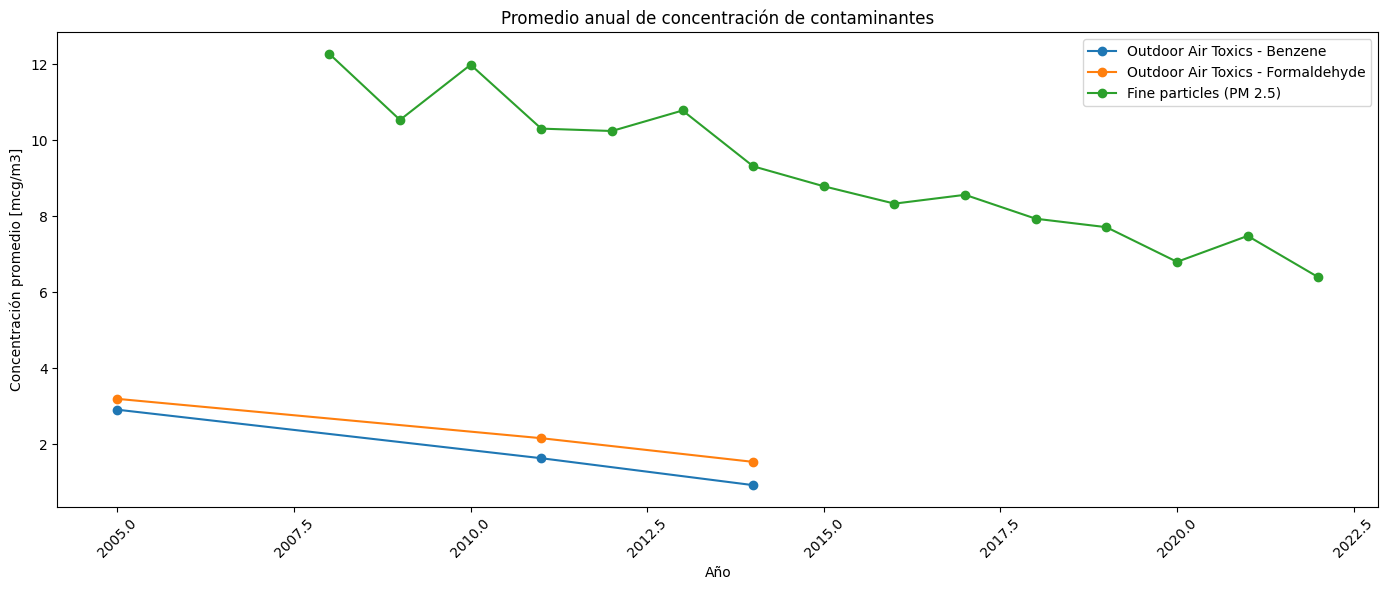

In [20]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('NYC_air_quality.csv')

# Filtrar las filas que tienen medida en mcg/m3
df_mcg = df[df['measure_info'] == 'mcg/m3']

# Filtrar las filas que corresponden a los contaminantes deseados
contaminantes_deseados = ['Outdoor Air Toxics - Benzene', 'Outdoor Air Toxics - Formaldehyde', 'Fine particles (PM 2.5)']
contaminantes_data = df_mcg[df_mcg['contaminante'].isin(contaminantes_deseados)]

# Convertir la columna 'fecha' a tipo datetime
contaminantes_data['fecha'] = pd.to_datetime(contaminantes_data['fecha'])

# Crear un diccionario para almacenar los DataFrames de cada contaminante
contaminantes_dfs = {}

# Calcular el promedio anual de los datos de cada contaminante
for contaminante in contaminantes_deseados:
    contaminante_data = contaminantes_data[contaminantes_data['contaminante'] == contaminante]
    contaminante_promedio_anual = contaminante_data.groupby(contaminante_data['fecha'].dt.year)['data_value'].mean()
    contaminantes_dfs[contaminante] = contaminante_promedio_anual

# Crear el gráfico de líneas para cada contaminante
plt.figure(figsize=(14, 6))
for contaminante, promedio_anual in contaminantes_dfs.items():
    plt.plot(promedio_anual.index, promedio_anual, marker='o', linestyle='-', label=contaminante)

plt.title('Promedio anual de concentración de contaminantes')
plt.xlabel('Año')
plt.ylabel('Concentración promedio [mcg/m3]')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


 ### Concentración promedio anual por indicador, Calcula la concentración promedio anual por [ppb] para cada indicador de contaminante.


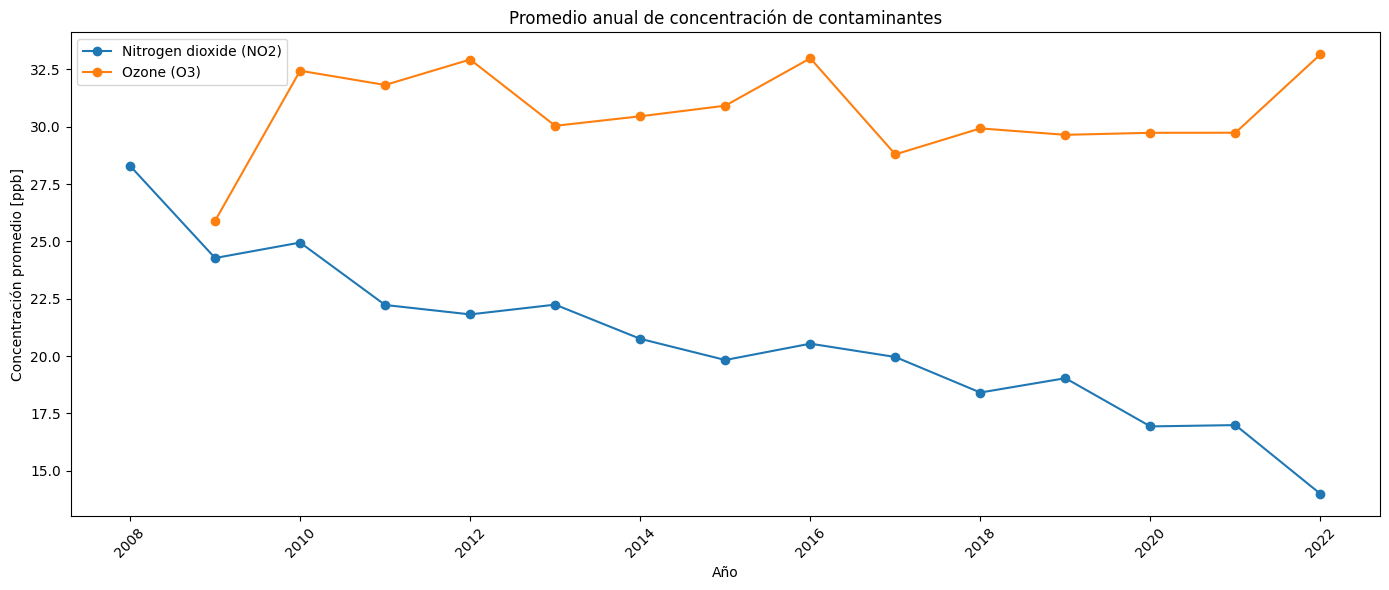

In [22]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('NYC_air_quality.csv')

# Filtrar las filas que tienen medida en mcg/m3
df_ppb = df[df['measure_info'] == 'ppb']

# Filtrar las filas que corresponden a los contaminantes deseados
contaminantes_deseados = ['Nitrogen dioxide (NO2)', 'Ozone (O3)']
contaminantes_data = df_ppb[df_ppb['contaminante'].isin(contaminantes_deseados)]

# Convertir la columna 'fecha' a tipo datetime
contaminantes_data['fecha'] = pd.to_datetime(contaminantes_data['fecha'])

# Crear un diccionario para almacenar los DataFrames de cada contaminante
contaminantes_dfs = {}

# Calcular el promedio anual de los datos de cada contaminante
for contaminante in contaminantes_deseados:
    contaminante_data = contaminantes_data[contaminantes_data['contaminante'] == contaminante]
    contaminante_promedio_anual = contaminante_data.groupby(contaminante_data['fecha'].dt.year)['data_value'].mean()
    contaminantes_dfs[contaminante] = contaminante_promedio_anual

# Crear el gráfico de líneas para cada contaminante
plt.figure(figsize=(14, 6))
for contaminante, promedio_anual in contaminantes_dfs.items():
    plt.plot(promedio_anual.index, promedio_anual, marker='o', linestyle='-', label=contaminante)

plt.title('Promedio anual de concentración de contaminantes')
plt.xlabel('Año')
plt.ylabel('Concentración promedio [ppb]')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


#### Aunque se observa una tendencia a la disminución de los niveles de contaminantes, estos aún mantienen valores preocupantes para el medio ambiente. Es imperativo buscar soluciones para abordar esta crisis medioambiental. La inversión en vehículos eléctricos emerge como una innovadora y prometedora alternativa para mitigar este problema, ofreciendo una oportunidad tangible para reducir nuestra huella ambiental y avanzar hacia un futuro más sostenible.

### nivel de concentracion por barrio

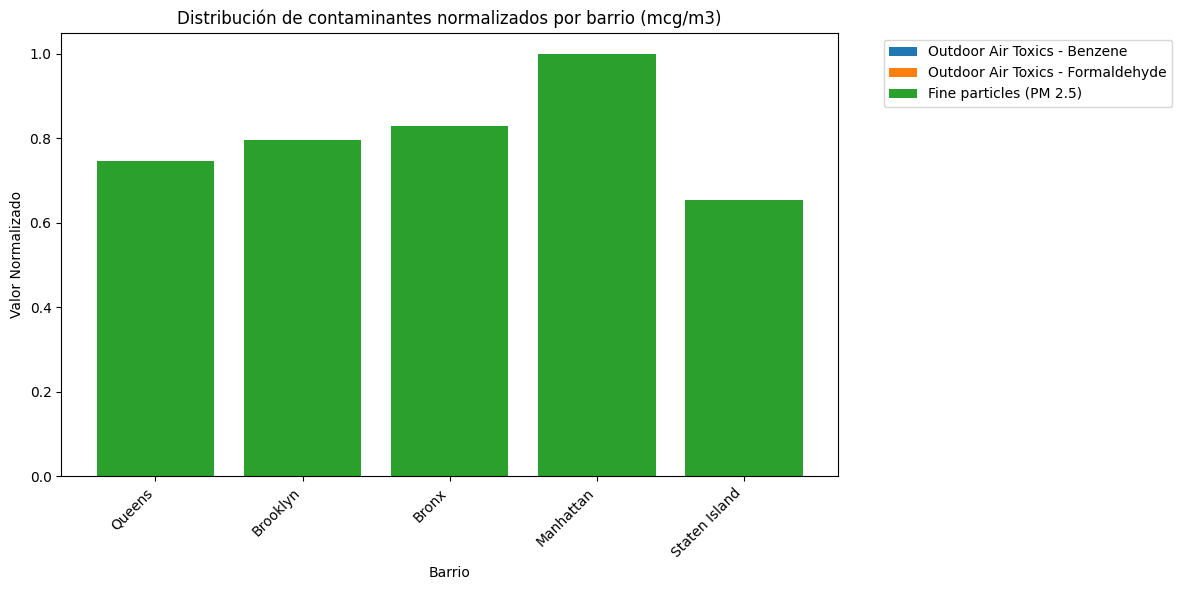

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('NYC_air_quality.csv')

# Filtrar el DataFrame por medida de información específica
# Aquí puedes seleccionar la medida de información deseada, por ejemplo 'mcg/m3' para microgramos por metro cúbico
medida_info = 'mcg/m3'
df_filtrado = df[df['measure_info'] == medida_info].copy()  # Hacemos una copia para evitar la vista

# Normalizar los valores de los contaminantes
scaler = MinMaxScaler()
df_filtrado['data_value_normalized'] = scaler.fit_transform(df_filtrado[['data_value']])

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
for contaminante in df_filtrado['contaminante'].unique():
    datos_contaminante = df_filtrado[df_filtrado['contaminante'] == contaminante]
    barrios = datos_contaminante['Barrio']
    plt.bar(barrios, datos_contaminante['data_value_normalized'], label=contaminante)

plt.xlabel('Barrio')
plt.ylabel('Valor Normalizado')
plt.title('Distribución de contaminantes normalizados por barrio (' + medida_info + ')')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


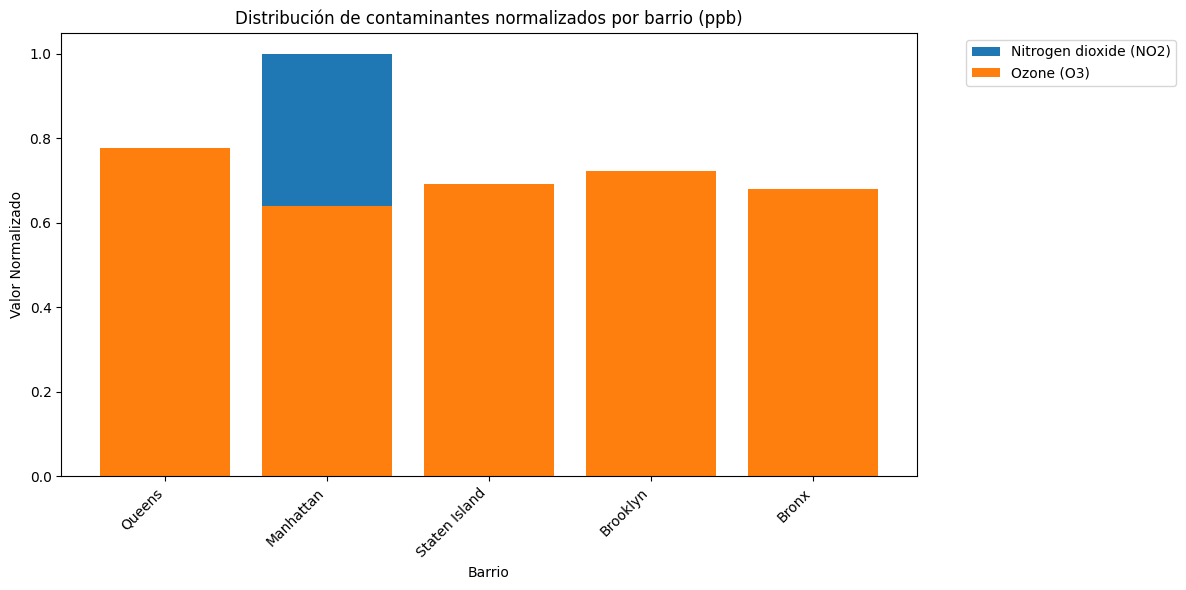

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('NYC_air_quality.csv')

# Filtrar el DataFrame por medida de información específica
# Aquí puedes seleccionar la medida de información deseada, por ejemplo 'mcg/m3' para microgramos por metro cúbico
medida_info = 'ppb'
df_filtrado = df[df['measure_info'] == medida_info].copy()  # Hacemos una copia para evitar la vista

# Normalizar los valores de los contaminantes
scaler = MinMaxScaler()
df_filtrado['data_value_normalized'] = scaler.fit_transform(df_filtrado[['data_value']])

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
for contaminante in df_filtrado['contaminante'].unique():
    datos_contaminante = df_filtrado[df_filtrado['contaminante'] == contaminante]
    barrios = datos_contaminante['Barrio']
    plt.bar(barrios, datos_contaminante['data_value_normalized'], label=contaminante)

plt.xlabel('Barrio')
plt.ylabel('Valor Normalizado')
plt.title('Distribución de contaminantes normalizados por barrio (' + medida_info + ')')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### El análisis revela un patrón alarmante de concentración de contaminantes en todos los barrios de la ciudad. Sin embargo, destaca la alta saturación en Manhattan, donde se registra una presencia notable de todos los contaminantes evaluados. Este fenómeno parece ser un reflejo directo del intenso tráfico vehicular característico de la zona, atribuible al ajetreado estilo de vida de la ciudad. Ante esta situación, se plantea la implementación de estrategias que fomenten la adopción de vehículos no contaminantes, particularmente en el transporte de pasajeros, como una medida crucial para mitigar los impactos adversos en la calidad del aire y la salud pública en esta área urbana